In [2]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt    
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc
from IPython.display import display
from sklearn.feature_extraction import DictVectorizer

In [3]:
telco_data= pd.read_csv(r"C:\Users\Ernest\Downloads\telco_churn.csv")
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.shape

(7043, 21)

In [5]:
# Getting a quick look into the dataset 
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Checking the statistical measures of the numerical variables in the dataset
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Since the We have to unify naming conventions to all lower characters:
telco_data.columns=telco_data.columns.str.lower()
telco_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
#checking for null values
telco_data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [10]:
#Finding unique values in the payment cat column
telco_data.paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [11]:
#Checking distribution of the variable of interest in the dataset
telco_data.churn.value_counts(normalize=True).round(4) 

churn
No     0.7346
Yes    0.2654
Name: proportion, dtype: float64

In [12]:
telco_data.multiplelines.value_counts(normalize=True)

multiplelines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

In [13]:
X=telco_data.drop('churn',axis=1)
y=telco_data['churn']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)

In [15]:
# Distribution of positive observations in both sets
display(y_train.value_counts(normalize=True).round(2), y_test.value_counts(normalize=True).round(2))

churn
No     0.74
Yes    0.26
Name: proportion, dtype: float64

churn
No     0.73
Yes    0.27
Name: proportion, dtype: float64

In [16]:
telco_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

<Axes: ylabel='churn'>

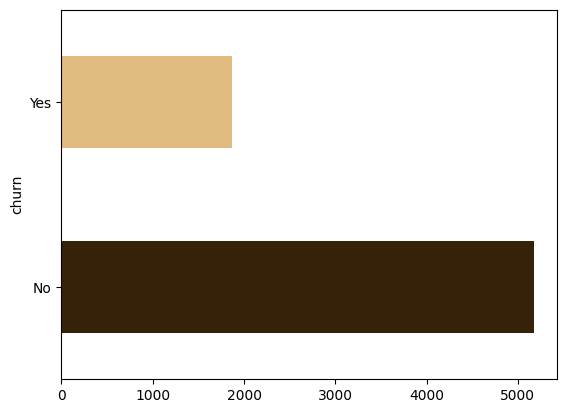

In [18]:
# We intend to show the customers who intend to leave(cut off use of the product) and those willing to continue using the Product
telco_data['churn'].value_counts().plot(kind='barh', color=('#352208','#e1bb80'))

C:\Users\Ernest\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


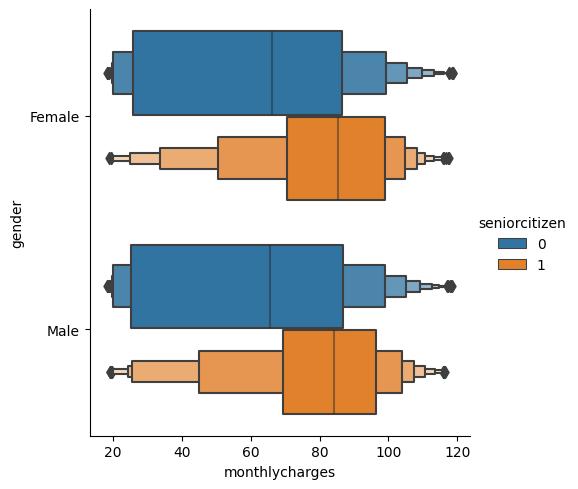

In [19]:
#distribution of charges
sns.catplot(data=telco_data, x="monthlycharges", y="gender", hue="seniorcitizen", kind="boxen")

In [20]:
#This is an imbalanced classification problem as there are fewer number of positive observations (churn) compared to negative ones, which means that:
#in order to establish a validation framework we will have to get
# Creating labels and predicters
X = telco_data.drop(['customerid', 'churn'], axis = 1) # predicters
y = telco_data.churn #labels
x_train, x_test, y_train, y_test = train_test_split(y, X, test_size = 0.2, random_state = 42)
X.head()  

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [21]:
#Splitting the Data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head() 

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


# Since this is an imbalanced dataset we will use Stratified split

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index, test_index in split.split(telco_data,telco_data.churn):
    strat_train_set = telco_data.loc[train_index]
    strat_test_set = telco_data.loc[test_index]

We will need to use a pairplot to identify relationships between variables that might not have been obvious from looking at individual plots.

array([[<Axes: title={'center': 'seniorcitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'monthlycharges'}>, <Axes: >]],
      dtype=object)

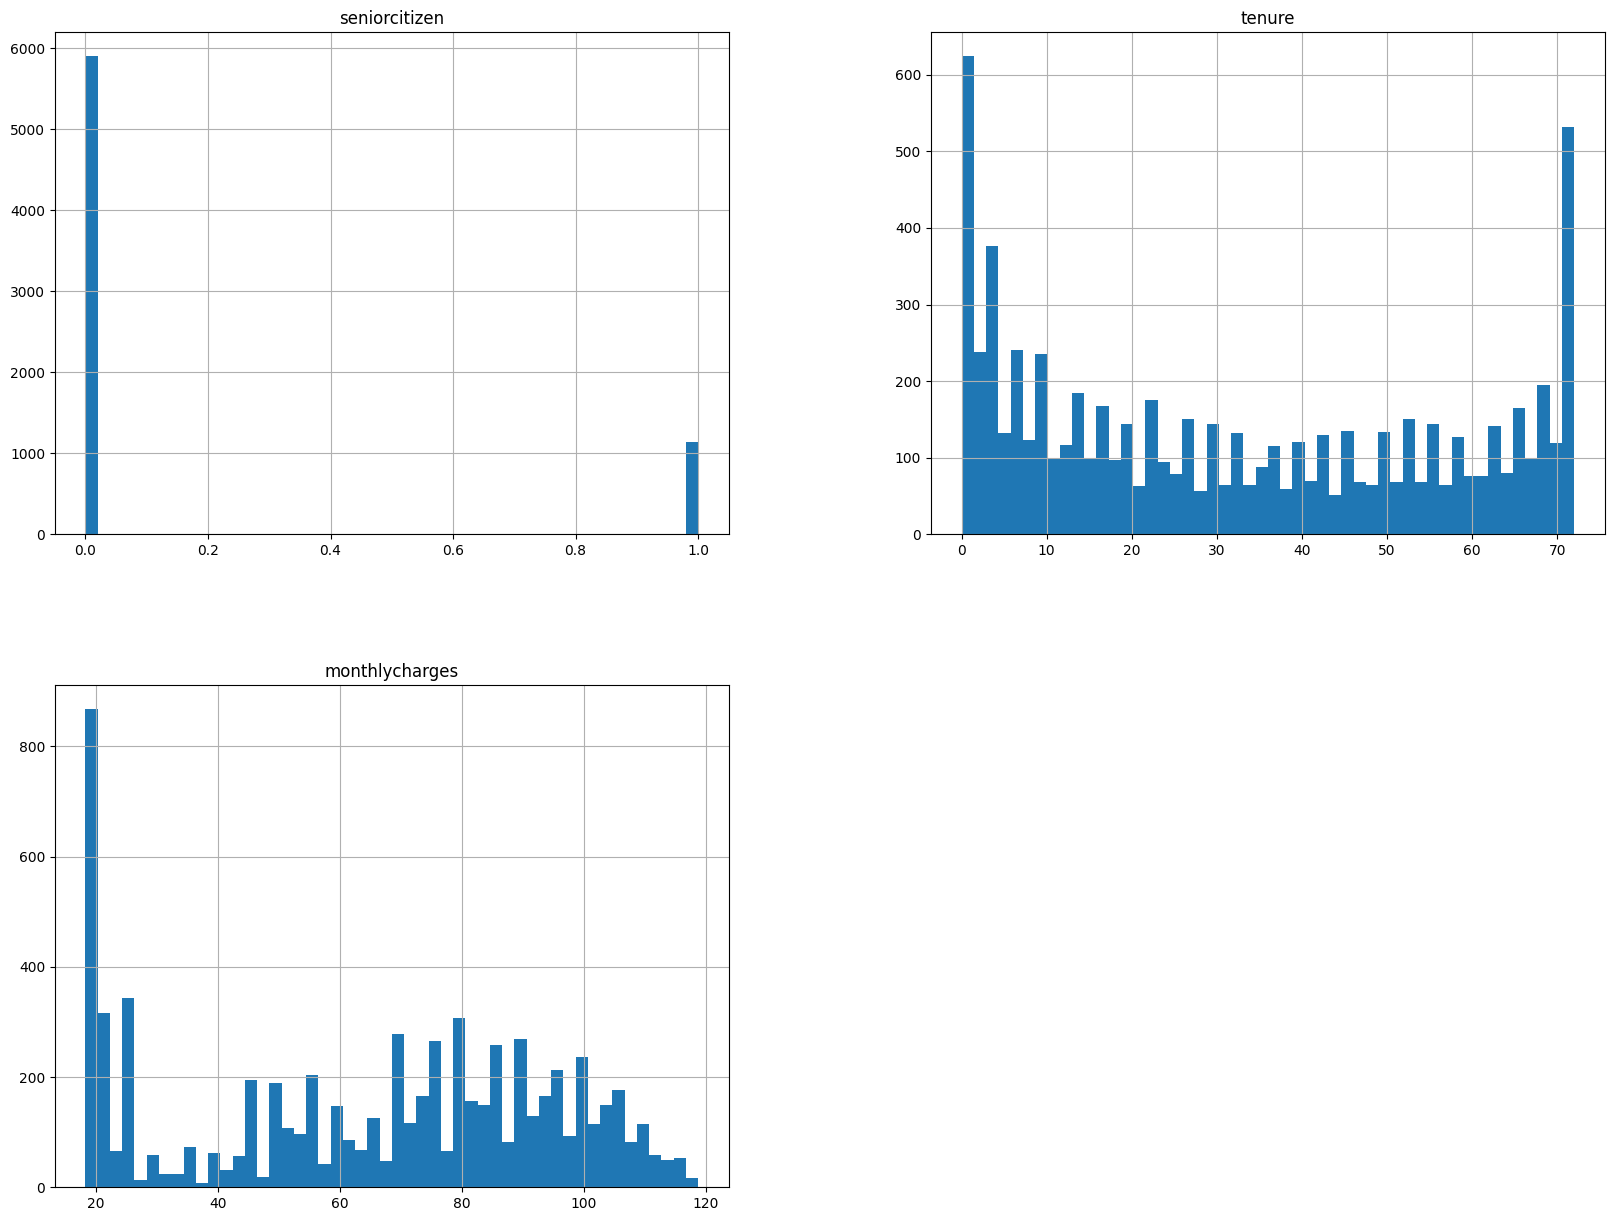

In [23]:
# Lets use the diagram kind as Histogram
telco_data.hist(bins=50,figsize=(20,15))

Delving into Machine Learning

In [25]:
telco_data=strat_train_set.drop('churn',axis=1)
telco_labels = strat_train_set['churn'].copy()

In [26]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#import pickle 
#pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
#getting the manipulated data for further vizualization 
telco_data[['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']].to_csv('ern.csv')